# Note:
- This notebook file may contain methods or algorithms that are NOT covered by the teaching content of BT4222 and hence will not be assessed in your midterm exam.
- It serves to increase your exposure in depth and breath to the practical methods in addressing the specific project topic. We believe it will be helpful for your current project and also your future internship endeavors.

# Machine learning for sentiment analysis

This notebook provides an example of applying Logistic regression and SVM to imdb dataset with scikit-learn. We adopted part of this [tutorial](https://www.kaggle.com/code/avnika22/imdb-perform-sentiment-analysis-with-scikit-learn). The dataset is only a subset of the original IMDB dataset for the convenience of reproducing with limited computing resource, so the accuracy would be lower.

## Agenda

1. Preparation and data loading
2. Data Visualization and preprocessing
3. Training and evaluation


## Part 1: Preparation and data loading
We first import some important libraries.

`Scikit-learn` often abbreviated as sklearn, is an open-source Python library designed for machine learning and data analysis. It provides a wide range of tools and functionalities for various tasks in machine learning, including classification, regression, clustering, dimensionality reduction, and more.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
# Convert a collection of text documents to a matrix of token counts.
# This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

**Load the dataset**

After reading the csv file which contains movie reviews,we see that there are two prominent columns. One being TEXT which contains the review and the other being LABEL which contains 0's and 1's.

In [ ]:
from google.colab import drive

import gdown

file_id = '1TPneTNMGP0tHQ94QxANmrkBtItgKG1Px'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'Test.csv'
gdown.download(url, output, quiet=False)

data=pd.read_csv("Test.csv")
data.head()

Downloading...
From: https://drive.google.com/uc?id=1TPneTNMGP0tHQ94QxANmrkBtItgKG1Px
To: /content/Test.csv
100%|██████████| 6.61M/6.61M [00:00<00:00, 75.4MB/s]


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


## Part2: Data Visualization and preprocessing
In this part, we have 5 steps:
1. Visualize data propotion
2. Clean the text
3. Tokenize the text
4. Remove stop words
5. Generate word clouds
6. Calculate TF-IDF


**Visualize data propotion:**

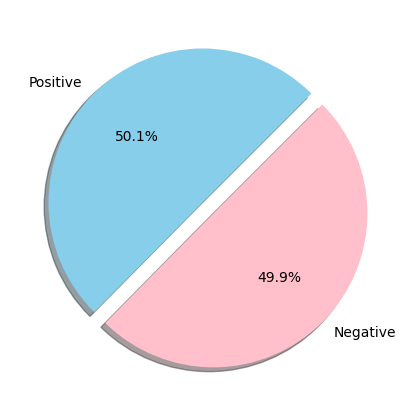

In [ ]:
fig=plt.figure(figsize=(5,5))
# Define colors for the pie chart segments
colors=["skyblue",'pink']
# Filter data to separate positive and negative labels
pos=data[data['label']==1]
neg=data[data['label']==0]
# Count the number of positive and negative instances
ck=[pos['label'].count(),neg['label'].count()]
# Create a pie chart with the counts of positive and negative instances
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

**Clean the text:**
Next we are going to Import `RE`, i.e Regular Expression Operation. We are using this library to remove HTML tags and non-word characters. Whenever we come across these tags we replace them with an empty string. In this function, we convert the text to lowercase.

Then we will also be altering emojis/emoticons which can be smiley :) , sad face :( or even some upset face :/. We will be shifting the emojis towards the end, so that we can get a set of clean text.

In [ ]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text
preprocessor("<a> this is :(  aweomee wohhhh :)")

' this is aweomee wohhhh :( :)'

**Tokenize the text:**
We are importing a new library PorterStemmer from nltk.stem.porter. It follows an algorithm for suffix stripping, i.e it will bring the word to its base meaning like 'running' will be changed to 'run', 'eating' will be changed to 'eat'. This is for simplifying the data and removing unnecessary complexities in our text data.

In [ ]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

In our tokenizer, we spilt sentence into word, words will be reduced to their base words.

In [ ]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

**Remove stop words:**
Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

**Generate word clouds:**
We now visualize the most frequent words in the positive and negative sentiment text data, while excluding certain common words that are unlikely to provide meaningful sentimental insights. This helps highlight the words that contribute to the sentiment context.

Positive words are as follows


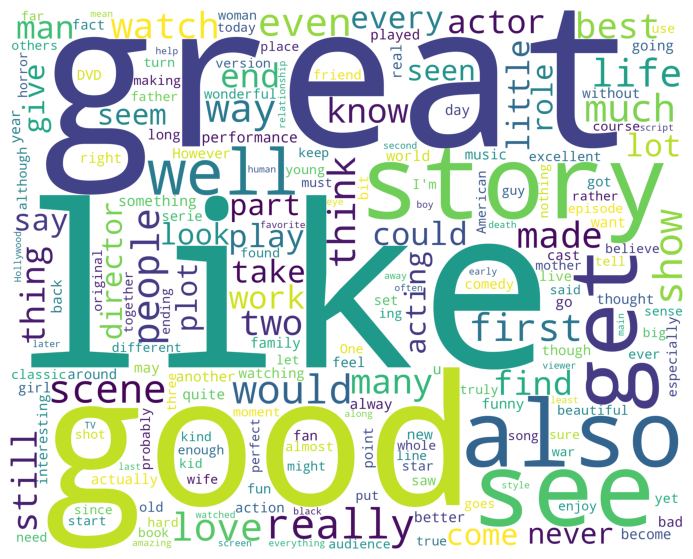

Negative words are as follows


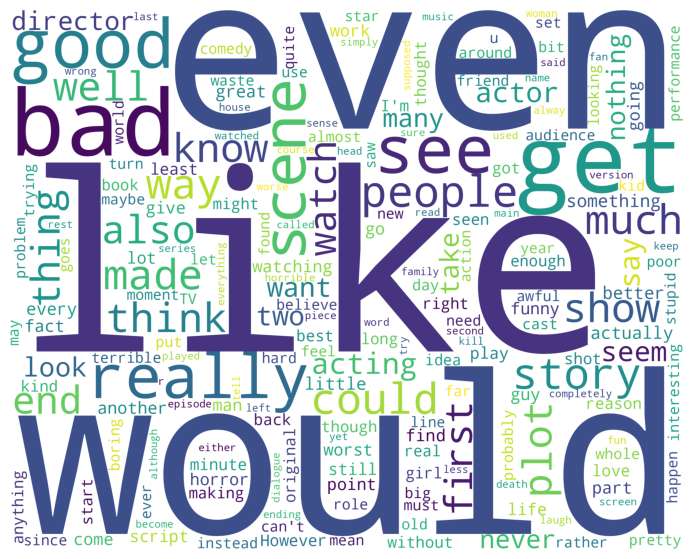

In [ ]:
from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    words = re.sub(r'(?:movie|film|br|one|character|time|make)', '', words)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

**Calculate TF_IDF:** TF-IDF (Term Frequency-Inverse Document Frequency) is a commonly used text feature extraction method used to measure the importance of a word in a collection of texts.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=True,stop_words=stop,preprocessor=preprocessor,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

Learn vocabulary and idf, return term-document matrix.

In [ ]:
y=data.label.values
x=tfidf.fit_transform(data.text)

## Part 3: Training and evaluation
Split arrays/matrices into train and test subsets

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

Then we can train our model now. We use SVM and logistic regression respectively.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
clf= SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
# use hinge for loss means soft margin linear SVM
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8408


In [ ]:
clf= SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
# use log for loss means logistic regression
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8636
